## Task- 6: Prediction using Decision Tree Algorithm

## Author: Shivam Khandelwal

In [8]:
#Importing Required Libraries in Python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.datasets import load_iris

In [9]:
#Loading the Dataset
iris= load_iris()

In [10]:
#Shape of the dataframe
row, col = iris.data.shape
print(row,col)

150 4


In [11]:
#Predictor and Target variables
print("Target variables", iris.target_names)
print("Feature variables", iris.feature_names)

Target variables ['setosa' 'versicolor' 'virginica']
Feature variables ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
#Extracting the Target and Predictor variables to X and Y 
X= iris.data
y= iris.target

In [17]:
#Dividing the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=25, test_size=0.25)

In [18]:
#Creating a decision tree model and training on training datatset
Model1 = DecisionTreeClassifier()
Model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### Since the above model is built on gini criterion, to broaden the work, we will try to implement one more model using the Entropy as criteria.

In [19]:
#creating one more decision tree classifier using Entropy measure
Model2 = DecisionTreeClassifier(criterion='entropy')
Model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### After training Two decision tree with different criterions, we will now be testing the performance on test data and see which one performs better

In [20]:
#Model 1 prediction:
Model1_Prediction = Model1.predict(X_test)
print('The Gini index criterion model was able to achieve accuracy on Train data = {} and the accuracy on Test data= {}'.format(accuracy_score(y_true=y_train, y_pred=Model1.predict(X_train)), accuracy_score(y_true=y_test, y_pred=Model1_Prediction)))

#Model 2 prediction:
Model2_prediction = Model2.predict(X_test)
print('The Entropy criterion model was able to achieve accuracy on Train data = {} and the accuracy on Test data= {}'.format(accuracy_score(y_true=y_train, y_pred=Model2.predict(X_train)), accuracy_score(y_true=y_test, y_pred=Model2_prediction)))

The Gini index criterion model was able to achieve accuracy on Train data = 1.0 and the accuracy on Test data= 0.9736842105263158
The Entropy criterion model was able to achieve accuracy on Train data = 1.0 and the accuracy on Test data= 0.8947368421052632


##### We can see the Gini Index based Decision Tree was able to give better prediction on Test Set, so we will try to visualize the gini based Tree

In [32]:
# Import necessary libraries for graph viz
from sklearn import tree
from matplotlib import pyplot as plt

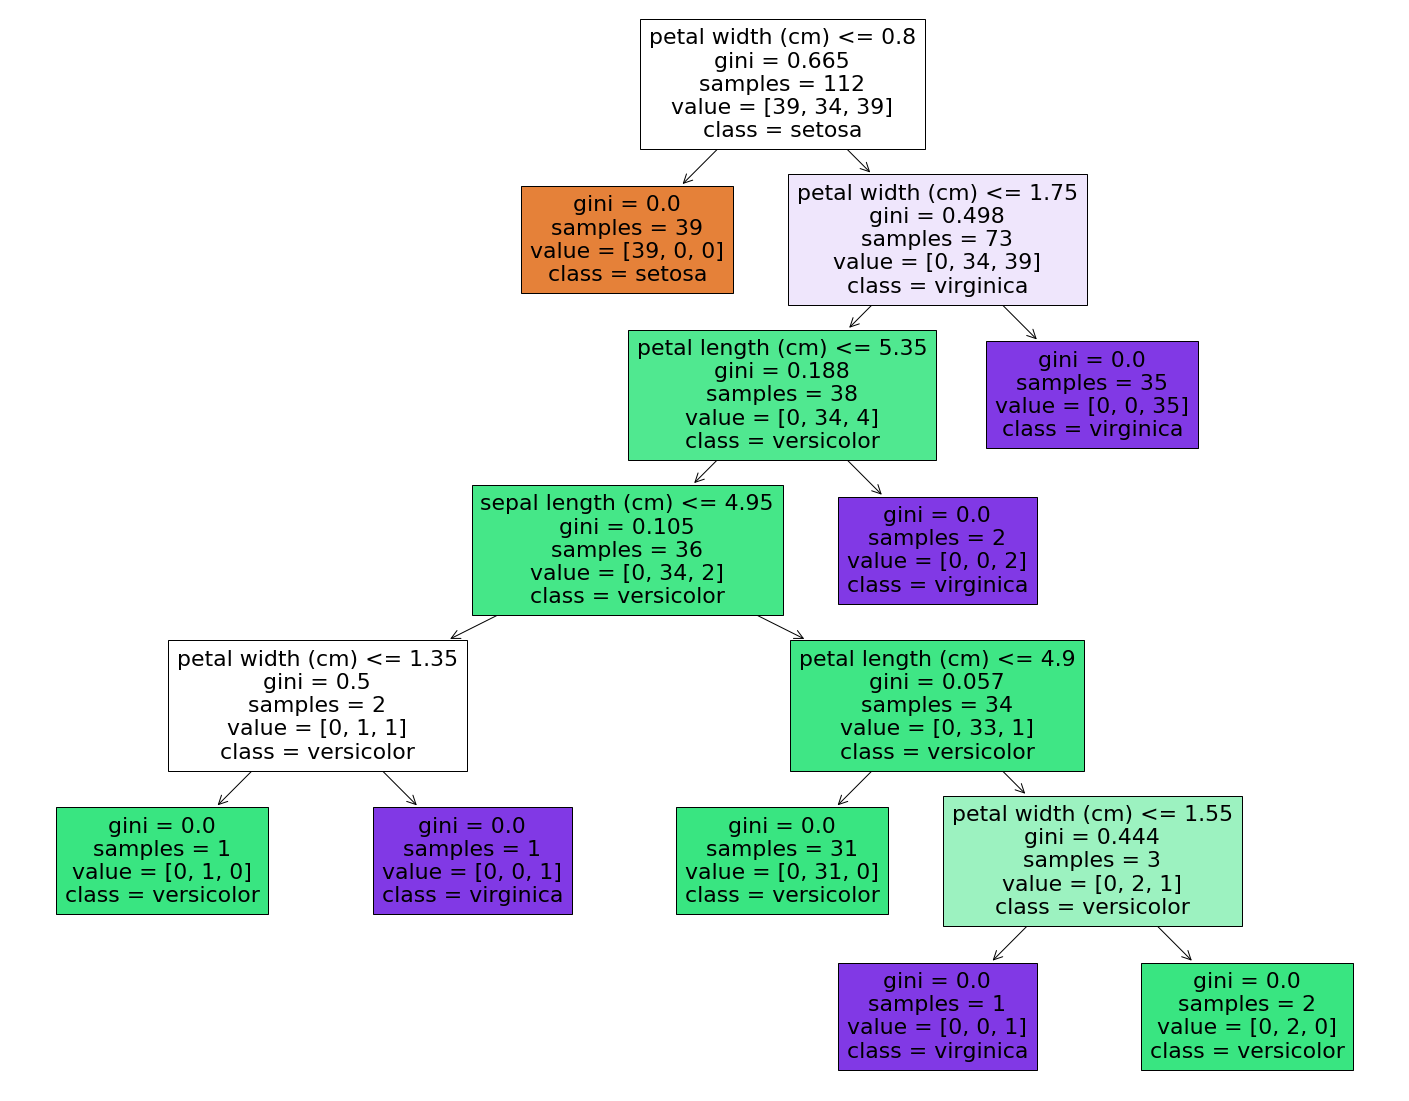

In [34]:
fig = plt.figure(figsize=(25,20))
VisGraph = tree.plot_tree(Model1, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)